## b1

In [1]:
import pandas as pd
import anndata
import scanpy as sc
import numpy as np

In [2]:
a = sc.read_h5ad('/diskmnt/Projects/Users/estorrs/sandbox/htan_brca_integrated.h5ad')
a

/diskmnt/Projects/Users/estorrs/miniconda3/envs/squidpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 887952 × 14
    obs: 'area', 'perimeter', 'bbox_row_min', 'bbox_col_min', 'bbox_row_max', 'bbox_col_max', 'centroid_row', 'centroid_col', 'eccentricity', 'DAPI intensity max', 'CD31 intensity max', 'E-cadherin intensity max', 'CD4 intensity max', 'CD20 intensity max', 'Ki67 intensity max', 'CD68 intensity max', 'Pan-CK intensity max', 'CD8 intensity max', 'Histone H3 Pho intensity max', 'CD163 intensity max', 'Podoplanin intensity max', 'CD36 intensity max', 'HIF1a intensity max', 'GLUT1 intensity max', 'GATA3 intensity max', 'CD45RO intensity max', 'CD45RA intensity max', 'SMA intensity max', 'MGP intensity max', 'Vimentin intensity max', 'Maspin intensity max', 'Foxp3 intensity max', 'MMP9 intensity max', 'HLA-DR intensity max', 'CK14 intensity max', 'CD11c intensity max', 'CD44 intensity max', 'DAPI intensity min', 'CD31 intensity min', 'E-cadherin intensity min', 'CD4 intensity min', 'CD20 intensity min', 'Ki67 intensity min', 'CD68 intensity mi

In [3]:
set(a.obs['sample_id'])

{'HT206B1-H1', 'HT323B1-H3', 'HT397B1-H2A2', 'HT397B1-H3A1'}

In [4]:
sample = 'HT397B1-H2A2'
f = a[a.obs['sample_id']==sample]
f

View of AnnData object with n_obs × n_vars = 152380 × 14
    obs: 'area', 'perimeter', 'bbox_row_min', 'bbox_col_min', 'bbox_row_max', 'bbox_col_max', 'centroid_row', 'centroid_col', 'eccentricity', 'DAPI intensity max', 'CD31 intensity max', 'E-cadherin intensity max', 'CD4 intensity max', 'CD20 intensity max', 'Ki67 intensity max', 'CD68 intensity max', 'Pan-CK intensity max', 'CD8 intensity max', 'Histone H3 Pho intensity max', 'CD163 intensity max', 'Podoplanin intensity max', 'CD36 intensity max', 'HIF1a intensity max', 'GLUT1 intensity max', 'GATA3 intensity max', 'CD45RO intensity max', 'CD45RA intensity max', 'SMA intensity max', 'MGP intensity max', 'Vimentin intensity max', 'Maspin intensity max', 'Foxp3 intensity max', 'MMP9 intensity max', 'HLA-DR intensity max', 'CK14 intensity max', 'CD11c intensity max', 'CD44 intensity max', 'DAPI intensity min', 'CD31 intensity min', 'E-cadherin intensity min', 'CD4 intensity min', 'CD20 intensity min', 'Ki67 intensity min', 'CD68 inte

In [6]:
cols = ['area', 'centroid_row', 'centroid_col']
df = f.obs[cols]
for c in f.var.index:
    df[c] = f[:, c].X.toarray().flatten()
df

/diskmnt/Projects/Users/estorrs/miniconda3/envs/squidpy/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,area,centroid_row,centroid_col,CD31,E-cadherin,Pan-CK,CD20,CD68,CD163,CD11c,CD3,CD4,CD8,Podoplanin,SMA,Vimentin,Ki67
cell_id,,,,,,,,,,,,,,,,,
1,1123,1138.959929,2758.504007,4.805633,7.492223,4.578660,4.757666,6.422573,4.291812,6.934699,6.014203,6.655411,7.124142,6.990420,4.565090,4.597931,4.928137
2,1221,1184.760033,7439.032760,4.657736,7.999714,7.444571,4.977575,6.132918,4.227641,6.419804,5.561390,6.301445,6.600645,6.360160,4.389411,6.023579,4.422721
3,950,1213.116842,7445.796842,4.559258,7.906015,7.306585,5.251248,6.364823,4.034446,6.391047,5.459944,6.410832,6.338843,6.305545,4.253101,4.420501,4.537432
4,840,1208.025000,7412.295238,4.639802,7.465276,6.907993,5.124276,6.046953,3.984831,6.402020,5.327107,6.285180,6.368357,5.872165,4.294512,4.807450,3.672647
5,1366,1237.803075,7424.157394,4.730505,8.592995,7.467430,5.490534,6.637053,4.205239,6.434314,5.576564,6.546406,6.195848,6.198375,4.441333,4.731261,4.661607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152376,274,19146.302920,4834.113139,3.707590,5.796102,2.106890,3.844619,5.297185,3.626383,4.890486,4.283033,5.497871,5.443554,5.460455,3.823551,3.028228,4.852059
152377,178,19147.528090,4901.466292,3.012722,5.619831,1.910790,3.126662,4.960248,3.547128,4.878622,4.603258,5.283261,4.970827,5.363795,3.645098,3.797255,3.249634
152378,155,19147.070968,8561.077419,4.659292,4.034070,4.038968,5.297317,7.260645,3.682407,5.837147,4.489868,7.123590,4.940074,1.760080,3.771499,6.687302,1.691167


In [7]:
a = sc.read_h5ad('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT397B1-H2A2/level_4/spatial_features.h5ad')
a

AnnData object with n_obs × n_vars = 152380 × 36
    obs: 'area', 'perimeter', 'bbox_row_min', 'bbox_col_min', 'bbox_row_max', 'bbox_col_max', 'centroid_row', 'centroid_col', 'eccentricity', 'DAPI intensity max', 'CD31 intensity max', 'E-cadherin intensity max', 'CD4 intensity max', 'CD20 intensity max', 'Ki67 intensity max', 'CD68 intensity max', 'Pan-CK intensity max', 'CD8 intensity max', 'Histone H3 Pho intensity max', 'CD163 intensity max', 'Podoplanin intensity max', 'CD3e intensity max', 'beta3-integrin intensity max', 'HIF1a intensity max', 'GLUT1 intensity max', 'GATA3 intensity max', 'CD45RO intensity max', 'CD45RA intensity max', 'SMA intensity max', 'CK19 intensity max', 'MGP intensity max', 'Vimentin intensity max', 'Maspin intensity max', 'Foxp3 intensity max', 'CK17 intensity max', 'MMP9 intensity max', 'HLA-DR intensity max', 'CD36 intensity max', 'CK14 intensity max', 'CD11c intensity max', 'cKit intensity max', 'COX2 intensity max', 'MLPH intensity max', 'Lyve-1 inten

In [11]:
cols = ['centroid_row', 'centroid_col']
df = a.obs[cols]
for c in a.var.index:
    df[c] = a[:, c].X.toarray().flatten()
df

/diskmnt/Projects/Users/estorrs/miniconda3/envs/squidpy/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,centroid_row,centroid_col,DAPI,CD31,E-cadherin,CD4,CD20,Ki67,CD68,Pan-CK,...,MMP9,HLA-DR,CD36,CK14,CD11c,cKit,COX2,MLPH,Lyve-1,CD44
cell_id,,,,,,,,,,,,,,,,,,,,,
1,1138.959929,2758.504007,339.660736,121.196793,1793.036499,775.976868,115.473732,137.121994,614.585022,96.383797,...,995.545837,536.942993,96.783615,1134.568970,1026.309937,78.294746,975.596619,487.073914,65.488869,836.707031
2,1184.760033,7439.032760,1451.941895,104.397217,2979.106445,544.359558,144.122025,82.322685,459.778870,1709.551147,...,594.940186,302.356262,86.945946,610.672424,612.882874,66.069618,620.104004,975.380005,76.288292,1276.641235
3,1213.116842,7445.796842,3039.466309,94.512634,2712.554688,607.400024,189.804214,92.450523,580.042114,1489.079956,...,714.693665,345.885254,68.427368,588.189453,595.481079,63.802105,616.716858,686.668396,93.238945,985.368408
4,1208.025000,7412.295238,1709.017822,102.523811,1745.336914,535.560730,167.052383,38.355953,421.822632,999.238098,...,531.942871,312.238098,64.002380,627.720215,602.061890,69.789284,622.873779,487.133331,76.775002,836.761902
5,1237.803075,7424.157394,2340.713867,112.352852,5392.742188,695.735718,241.386536,104.806000,761.844055,1749.103271,...,648.593689,336.932648,61.420937,616.938477,621.855042,65.073204,552.858704,645.254028,97.879944,1200.942871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152376,19146.302920,4834.113139,1716.602173,39.755474,328.014587,243.171539,45.740875,127.003647,198.773727,7.222628,...,160.558395,117.036499,21.310219,419.098541,132.018250,34.357666,95.405113,130.948898,36.109489,786.901489
152377,19147.528090,4901.466292,1533.657349,19.342697,274.842682,196.011230,21.797752,24.780899,141.629211,5.758427,...,169.168533,84.426964,32.370785,92.803368,130.449432,36.056179,144.853928,93.938202,42.859550,461.966278
152378,19147.070968,8561.077419,1908.735474,104.561287,55.490322,1239.896729,198.800003,4.425807,1422.174194,55.767742,...,13.503226,2967.993652,27.400000,2.077419,341.799988,31.348387,46.496773,158.006454,78.716125,2074.677490


In [12]:
o = sc.read_h5ad('/diskmnt/Projects/Users/estorrs/sandbox/htan_brca_integrated.h5ad')
o

/diskmnt/Projects/Users/estorrs/miniconda3/envs/squidpy/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 887952 × 14
    obs: 'area', 'perimeter', 'bbox_row_min', 'bbox_col_min', 'bbox_row_max', 'bbox_col_max', 'centroid_row', 'centroid_col', 'eccentricity', 'DAPI intensity max', 'CD31 intensity max', 'E-cadherin intensity max', 'CD4 intensity max', 'CD20 intensity max', 'Ki67 intensity max', 'CD68 intensity max', 'Pan-CK intensity max', 'CD8 intensity max', 'Histone H3 Pho intensity max', 'CD163 intensity max', 'Podoplanin intensity max', 'CD36 intensity max', 'HIF1a intensity max', 'GLUT1 intensity max', 'GATA3 intensity max', 'CD45RO intensity max', 'CD45RA intensity max', 'SMA intensity max', 'MGP intensity max', 'Vimentin intensity max', 'Maspin intensity max', 'Foxp3 intensity max', 'MMP9 intensity max', 'HLA-DR intensity max', 'CK14 intensity max', 'CD11c intensity max', 'CD44 intensity max', 'DAPI intensity min', 'CD31 intensity min', 'E-cadherin intensity min', 'CD4 intensity min', 'CD20 intensity min', 'Ki67 intensity min', 'CD68 intensity mi

In [13]:
o.obs

,area,perimeter,bbox_row_min,bbox_col_min,bbox_row_max,bbox_col_max,centroid_row,centroid_col,eccentricity,DAPI intensity max,...,MGP intensity min,Vimentin intensity min,Maspin intensity min,Foxp3 intensity min,MMP9 intensity min,HLA-DR intensity min,CK14 intensity min,CD11c intensity min,CD44 intensity min,sample_id
cell_id,,,,,,,,,,,,,,,,,,,,,
1,520,110.840620,0,3673,25,3709,8.378846,3693.750000,0.723583,49006.0,...,803.0,1.0,454.0,205.0,0.0,8.0,1547.0,404.0,38.0,HT206B1-H1
2,409,98.704581,0,3711,26,3740,8.728606,3722.951100,0.452175,44971.0,...,573.0,0.0,54.0,15.0,0.0,8.0,4518.0,61.0,29.0,HT206B1-H1
3,845,150.675144,0,3739,32,3776,13.584615,3755.928994,0.368285,49170.0,...,275.0,2.0,24.0,19.0,0.0,4.0,8671.0,21.0,71.0,HT206B1-H1
4,241,70.870058,0,3873,12,3902,4.082988,3886.991701,0.928244,49978.0,...,758.0,1.0,419.0,191.0,47.0,6.0,56332.0,283.0,95.0,HT206B1-H1
5,733,115.639610,0,3888,35,3921,16.049113,3906.064120,0.497079,59773.0,...,819.0,2.0,24.0,23.0,13.0,3.0,4903.0,65.0,66.0,HT206B1-H1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245792,164,66.491378,20144,7479,20160,7495,20152.152439,7487.085366,0.704861,5022.0,...,29.0,0.0,0.0,0.0,7.0,0.0,3.0,0.0,46.0,HT397B1-H3A1
245793,362,120.396970,20145,4399,20160,4431,20152.436464,4415.226519,0.895482,6867.0,...,2.0,0.0,30.0,0.0,19.0,0.0,16.0,0.0,0.0,HT397B1-H3A1
245794,203,81.876154,20146,7087,20160,7110,20152.852217,7097.862069,0.910259,11646.0,...,0.0,0.0,31.0,1.0,11.0,0.0,1.0,0.0,152.0,HT397B1-H3A1


In [14]:
df.to_csv('/diskmnt/Projects/Users/estorrs/sandbox/test_csv.csv', sep=',')

In [15]:
a = sc.read_h5ad('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/downstream_analysis/neighborhood_analysis.h5ad')
a

AnnData object with n_obs × n_vars = 221081 × 17
    obs: 'area', 'perimeter', 'bbox_row_min', 'bbox_col_min', 'bbox_row_max', 'bbox_col_max', 'centroid_row', 'centroid_col', 'eccentricity', 'DAPI intensity max', 'CD31 intensity max', 'E-cadherin intensity max', 'CD4 intensity max', 'CD20 intensity max', 'Ki67 intensity max', 'CD68 intensity max', 'Pan-CK intensity max', 'CD8 intensity max', 'Histone H3 Pho intensity max', 'CD163 intensity max', 'Podoplanin intensity max', 'CD3 intensity max', 'CD36 intensity max', 'HIF1a intensity max', 'GLUT1 intensity max', 'GATA3 intensity max', 'CD45RO intensity max', 'CD45RA intensity max', 'SMA intensity max', 'CK19 intensity max', 'MGP intensity max', 'Vimentin intensity max', 'Maspin intensity max', 'Foxp3 intensity max', 'MMP9 intensity max', 'HLA-DR intensity max', 'CK14 intensity max', 'CD11c intensity max', 'CD44 intensity max', 'DAPI intensity min', 'CD31 intensity min', 'E-cadherin intensity min', 'CD4 intensity min', 'CD20 intensity min

In [16]:
df = a.obs[['cell_type', 'LDA_kmeans_cluster', 'metacluster']]
df

,cell_type,LDA_kmeans_cluster,metacluster
cell_id,,,
1,Malignant,1,Tumor - Pure
2,Malignant,1,Tumor - Pure
3,Malignant,1,Tumor - Pure
4,Malignant,1,Tumor - Pure
5,Malignant,1,Tumor - Pure
...,...,...,...
221077,Macrophage,10,Tumor - Pure
221078,Malignant,1,Tumor - Pure
221079,Malignant,1,Tumor - Pure


In [18]:
df.to_csv('/diskmnt/Projects/Users/estorrs/sandbox/ht206_annotations.csv', sep=',')

## b2

In [3]:
import tifffile
import skimage

import matplotlib.pyplot as plt
import numpy as np

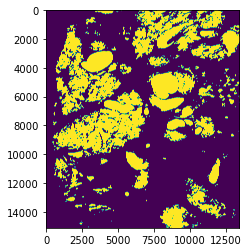

In [4]:
m = tifffile.imread('/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/HT206B1-H1/level_3/annotations/tumor.tif')
plt.imshow(m)

In [5]:
labels = skimage.morphology.label(m)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

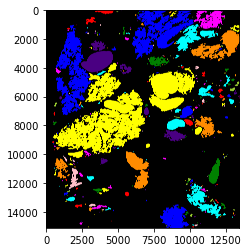

In [6]:
plt.imshow(skimage.color.label2rgb(labels))

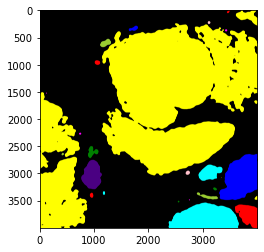

In [9]:
plt.imshow(skimage.color.label2rgb(labels)[4000:8000, 6000:10000])

In [14]:
def erode(img, n=1):
    e = img.copy()
    for i in range(n):
        e = skimage.morphology.binary_erosion(e)
    return e

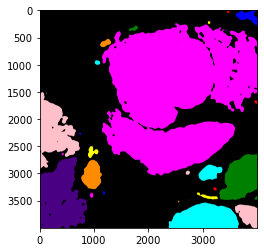

In [12]:
plt.imshow(skimage.color.label2rgb(skimage.morphology.label(erode(labels[4000:8000, 6000:10000]))))

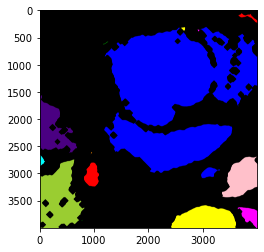

In [17]:
plt.imshow(skimage.color.label2rgb(skimage.morphology.label(erode(labels[4000:8000, 6000:10000], n=50))))